In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon
from google.colab import files
import time
from matplotlib.lines import Line2D

Saving data.csv to data (1).csv


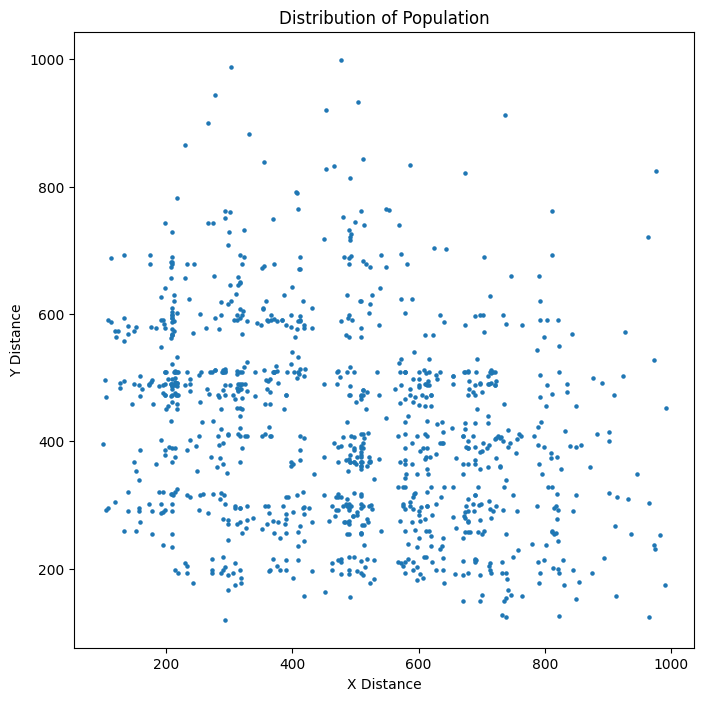

Total data points: 1014


In [9]:
uploaded = files.upload()
data = pd.read_csv('data.csv')

np.random.seed(42)

plt.figure(figsize=(8, 8))
plt.scatter(data['x'], data['y'], s=5)
plt.title('Distribution of Population')
plt.xlabel('X Distance')
plt.ylabel('Y Distance')
plt.show()

total_data_points = len(data)
print(f"Total data points: {total_data_points}")

In [48]:
optimal_k = 11
start_time = time.time()
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data)
end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken for clustering: {time_taken:.4f} seconds")

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
unique_labels = set(labels)

Time taken for clustering: 0.0094 seconds


In [49]:
def buffered_hull(points, buffer_distance=0.05):
    if len(points) < 3:
        return Polygon(points).buffer(buffer_distance)
    hull = ConvexHull(points)
    poly_points = points[hull.vertices]
    polygon = Polygon(poly_points)
    return polygon.buffer(buffer_distance)

<ipython-input-50-963f4262c82f>:20: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroid[0], centroid[1], c='black', s=100, marker='x', edgecolors='w', zorder=5)


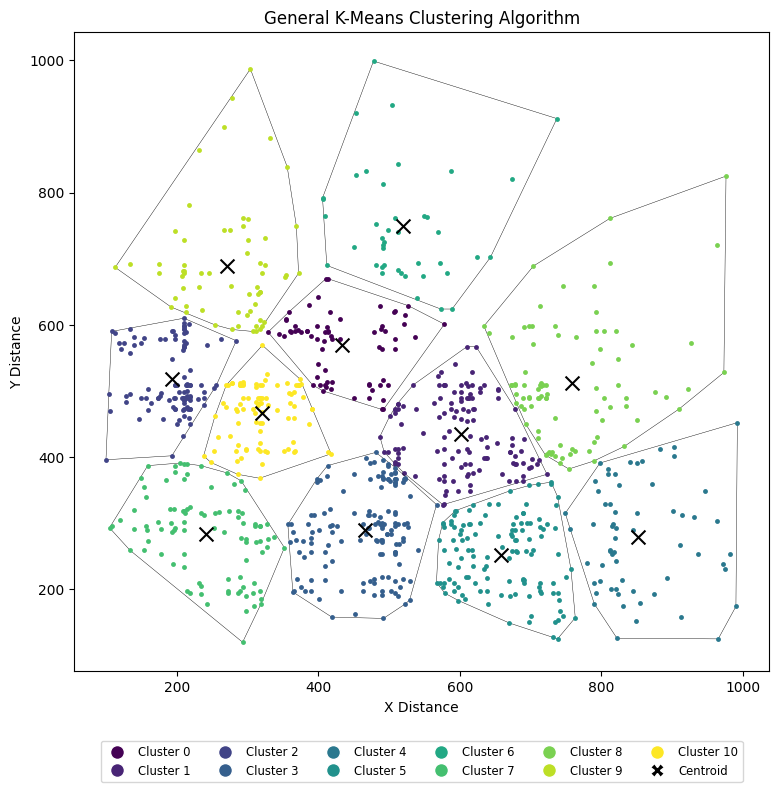

In [50]:
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(8, 8))
legend_elements = []

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = data.values[class_member_mask]
    legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=10, label=f'Cluster {k}'))

    # Plot the convex hull for each cluster
    if len(xy) > 2:
        hull_polygon = buffered_hull(xy)
        if hull_polygon.is_valid:
            x, y = hull_polygon.exterior.xy
            plt.plot(x, y, 'k-', linewidth=0.3)  # Use thin solid lines

    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col), markersize=7, markeredgewidth=0)

for label, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], c='black', s=100, marker='x', edgecolors='w', zorder=5)

# Add a single legend entry for centroids
legend_elements.append(Line2D([0], [0], marker='X', color='w', markerfacecolor='black', markersize=10, label='Centroid'))

# Finalize the plot
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize='small', ncol=6)
plt.title('General K-Means Clustering Algorithm')
plt.xlabel('X Distance')
plt.ylabel('Y Distance')
plt.tight_layout()
plt.show()


In [54]:
max_lines = 4
print_data = [f"Cluster {label}: {sum(labels == label)} data points" for label in unique_labels if label != -1]
formatted_output = [""] * max_lines
for i, line in enumerate(print_data):
    column_index = i // max_lines
    row_index = i % max_lines
    formatted_output[row_index] += f"{line:<30}"
print("\nDATA POINTS PER CLUSTERS:")
for line in formatted_output:
    print(line)


DATA POINTS PER CLUSTERS:
Cluster 0: 70 data points     Cluster 4: 62 data points     Cluster 8: 89 data points     
Cluster 1: 127 data points    Cluster 5: 124 data points    Cluster 9: 62 data points     
Cluster 2: 104 data points    Cluster 6: 42 data points     Cluster 10: 92 data points    
Cluster 3: 146 data points    Cluster 7: 96 data points     


In [55]:
print_data = [f"Cluster {label}: {centroid}" for label, centroid in enumerate(centroids)]
formatted_output = [""] * max_lines
for i, line in enumerate(print_data):
    column_index = i // max_lines
    row_index = i % max_lines
    formatted_output[row_index] += f"{line:<45}"
print("\nCENTROIDS OF THE CLUSTERS:")
for line in formatted_output:
    print(line)


CENTROIDS OF THE CLUSTERS:
Cluster 0: [433.41428571 569.01428571]       Cluster 4: [851.90322581 279.64516129]       Cluster 8: [757.91011236 512.05617978]       
Cluster 1: [600.96062992 435.58267717]       Cluster 5: [658.67741935 251.79032258]       Cluster 9: [271.66129032 689.69354839]       
Cluster 2: [193.49038462 517.97115385]       Cluster 6: [519.07142857 749.04761905]       Cluster 10: [319.91304348 466.54347826]      
Cluster 3: [466.24657534 289.61643836]       Cluster 7: [241.35416667 283.16666667]       
